
# IMPORT DATASET/MODULES



In [4]:
pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#api to fetch dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other


In [ ]:
#extracting the compressed datset
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [3]:
#IMPORTING NECCESERY MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# BASIC EDA ON THE GIVEN DATSET

In [ ]:
#loading the dataset
cname=['target','id','date','flag','user','text']
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=cname)

In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<Axes: xlabel='target', ylabel='count'>

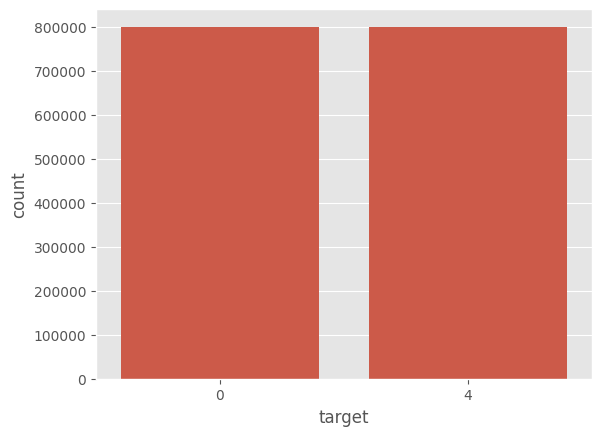

In [ ]:
sns.countplot(x = 'target',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
#checking for duplicate data
df.duplicated().sum()

0

# DATA CLEANING/ PRE-PROCESSING

DATA CLEANING AND PREPROCESSING WILL BE DONE HERE AND FOLLOWING ARE TO BE COVERED HERE,


*   REMOVE URLS AND HTML TAGS
*   LOWERCASING THE TEXT
*   REMOVE CHATWORDS-(ASAP, BTW ,OMG)
*   REMOVING PUNCTUAION AND STOPWORDS
*   REMOVING WHITESPACE AND SPECIAL CHARECTERS
*   


In [ ]:
#counting no of missing values


In [ ]:
#REMOVE HTML TAGS AND URLS
import re
import string,time
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def remove_html(text):
    clean_text=re.sub(r'<.*?>','',text)
    return clean_text
def remove_url(text):
    clean_text=re.sub(r"http?://\S+|www\.\S+|\b\w+\.(com|org|net|io|gov|edu)\b\S*",'',text)
    return clean_text
  #CONVER TO LOWER CASE
def convert_to_lowercase(text):
      return text.lower()
  #REMOVE TWITTER TAGS
def remove_twitter_tags(text):
      clean_text = re.sub(r'@\w+', '', text)
      return clean_text
  #REMOVING CHATWORDS
def replace_chat_words(text):
      chat_words = {
          "BRB": "Be right back",
          "BTW": "By the way",
          "OMG": "Oh my God/goodness",
          "TTYL": "Talk to you later",
          "OMW": "On my way",
          "SMH": "Shaking my head", "SMDH": "Shaking my darn head",
          "LOL": "Laugh out loud",
          "ROFL": "Rolling on the floor laughing",
          "LMAO": "Laughing my ass off",
          "LMFAO": "Laughing my freaking ass off",
          "TBD": "To be determined",
          "IMHO": "In my humble opinion", "IMO": "In my opinion",
          "HMU": "Hit me up",
          "IIRC": "If I remember correctly",
          "LMK": "Let me know",
          "OG": "Original gangsters (used for old friends)",
          "FTW": "For the win",
          "NVM": "Nevermind",
          "OOTD": "Outfit of the day",
          "NGL": "Not gonna lie",
          "RQ": "Real quick",
          "IYKYK": "If you know, you know",
          "ONG": "On God (I swear)",
          "YAAAS": "Yes!",
          "BRT": "Be right there",
          "SM": "So much",
          "IG": "I guess",
          "WYA": "Where you at",
          "ISTG": "I swear to God",
          "HBU": "How about you",
          "ATM": "At the moment",
          "ASAP": "As soon as possible",
          "FYI": "For your information",
          "TBH": "To be honest",
          "IDC": "I don't care",
          "IDK": "I don't know",
          "ILY": "I love you",
          "IMU": "I miss you",
          "JK": "Just kidding",
          "TMI": "Too much information",
          "GTG": "Got to go",
          "G2G": "Got to go",
          "BFF": "Best friends forever",
          "TTYT": "Talk to you tomorrow",
          "GG": "Good game",
          "GLHF": "Good luck, have fun",
          "WTF": "What the freak",
          "FML": "Freak my life",
          "IDC": "I don't care",
          "DM": "Direct message",
          "PM": "Private message",
          "BTS": "Behind the scenes",
          "STFU": "Shut the freak up",
          "GRWM": "Get ready with me",
          "FWIW": "For what it's worth",
          "YOLO": "You only live once",
          "TT": "Throwback Thursday",
          "MFW": "My face when",
          "SMTH": "Something",
          "WB": "Welcome back",
          "SYS": "See you soon",
          "CW": "Content warning",
          "NSFW": "Not safe for work",
          "TBF": "To be fair",
          "FOMO": "Fear of missing out",
          "GOAT": "Greatest of all time",
          "SUS": "Suspicious",
          "B4": "Before",
          "THX": "Thanks",
          "NP": "No problem",
          "PLS": "Please",
          "K": "Okay",
          "KK": "Okay",
          "XOXO": "Hugs and kisses"
      }
      def replace_match(match):
          return chat_words[match.group(0).upper()]

      pattern = r'\b(' + '|'.join(re.escape(word) for word in chat_words.keys()) + r')\b'
      return re.sub(pattern, replace_match, text, flags=re.IGNORECASE)

  #REMOVE PUNCTUAION
string.punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
  #REMOVE STOPWORDS
from nltk.corpus import stopwords
def remove_stopwords(text):
      stop_words = set(stopwords.words('english'))
      words = text.split()
      filtered_words = [word for word in words if word.lower() not in stop_words]
      return ' '.join(filtered_words)
  #REMOVE WHITESPACE
def remove_whitespace(text):
      return text.strip()

  #REMOVE SPECIAL CHARECTERS
def remove_special_characters(text):
      clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
      return clean_text
  #LEMMATIZATION
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
      words = text.split()
      words = [lemmatizer.lemmatize(word) for word in words]
      return " ".join(words)
  #DATA CLEANING
def preprocess_text(text):
      text = remove_twitter_tags(text)
      text = remove_html(text)
      text = remove_url(text)
      text = remove_special_characters(text)
      text = convert_to_lowercase(text)
      text = replace_chat_words(text)
      text = remove_punctuation(text)
      text = remove_stopwords(text)
      text = lemmatize_text(text)
      text = remove_whitespace(text)

      return text
df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df=df.head(300000)

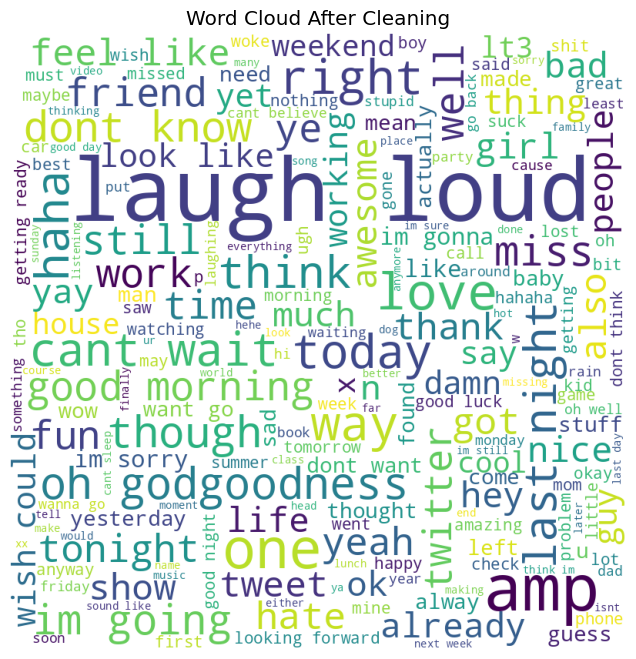

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stop_words,
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
df['text'] = df['text'].apply(preprocess_text)
generate_word_cloud(' '.join(df['text']), 'Word Cloud After Cleaning')

<ipython-input-44-5df5c8fc678d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


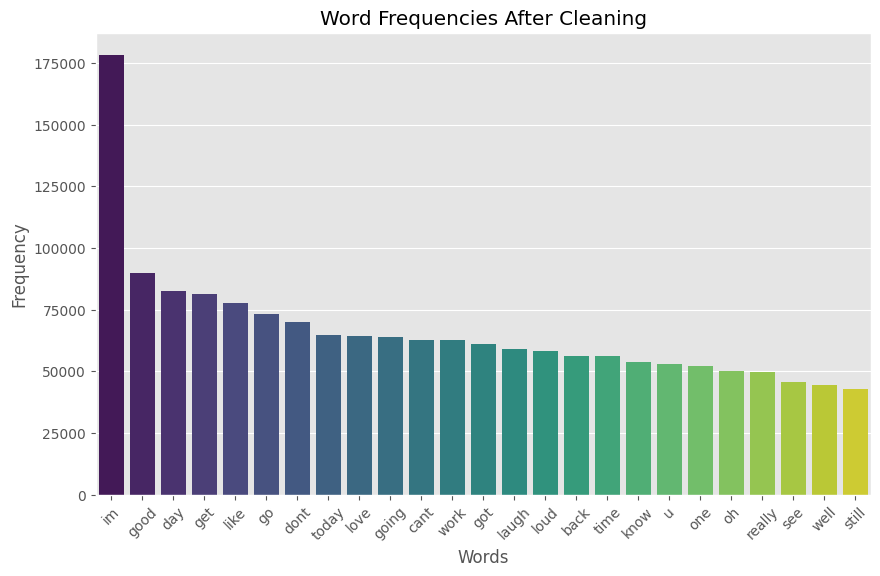

In [ ]:
def plot_word_frequencies(text, title):
    word_freq = nltk.FreqDist(text.split())
    common_words = word_freq.most_common(25)
    words, freqs = builtins.zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
import builtins
plot_word_frequencies(' '.join(df['text']), 'Word Frequencies After Cleaning')

<ipython-input-44-5df5c8fc678d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


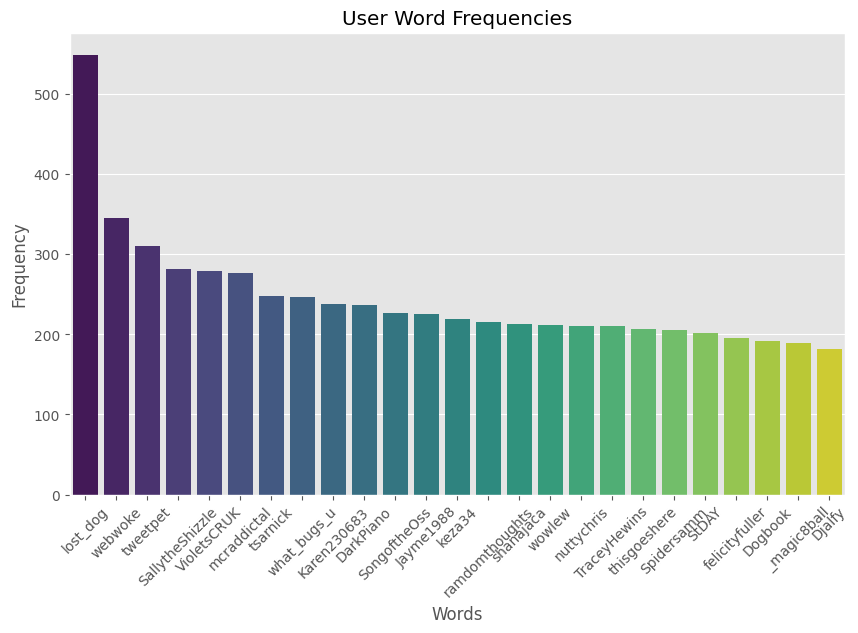

In [ ]:
plot_word_frequencies(' '.join(df['user']), 'User Word Frequencies')

# LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.781753125
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           4       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



## Bi-LSTM

# NAIVE BAYES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
X = df['text']  # Feature: text column
y = df['target']  # Label: target column
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)  # Fit on training data
X_test = vectorizer.transform(X_test_raw)       # Transform test data

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")



Accuracy: 0.76995
F1 Score: 0.7698604136168963
Recall: 0.76995
Precision: 0.7704752757344235
